In [6]:
import tensorflow as tf
from keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten


Importing data

In [7]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

<function matplotlib.pyplot.show>

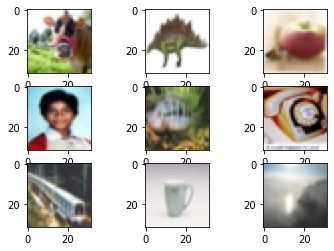

In [8]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i])
plt.show

In [9]:
import pandas as pd
labels = pd.read_csv('/content/cifar100_labels.csv', header=None, index_col=0)
labels.head()

,1
0,
0,apple
1,aquarium_fish
2,baby
3,bear
4,beaver


Visualizing Images with their labels

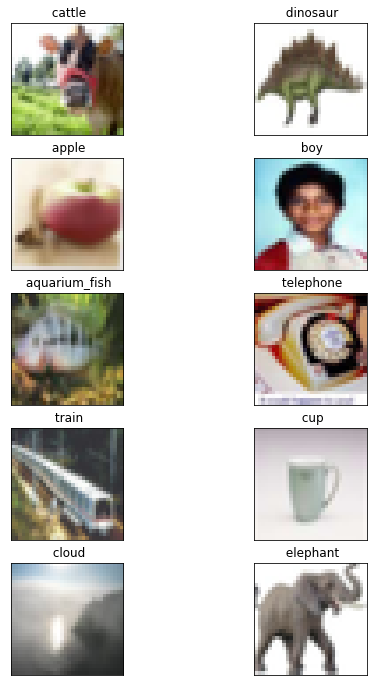

In [10]:
plt.figure(figsize=(8, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_train[i])
    plt.title(labels[1][y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

Shape of Training and Test Images

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Normalizing Images

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Build CNN Model

In [13]:
model = tf.keras.Sequential([
                            tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512, activation = 'relu'),
                            tf.keras.layers.Dense(256, activation = 'relu'),

                            tf.keras.layers.Dense(len(np.unique(X_train)), activation = 'softmax')
                             
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ["accuracy"])

In [16]:
early_stop = EarlyStopping(monitor="val_loss", verbose=1, patience=3)

In [17]:
history = model.fit(X_train,y_train, epochs=50, callbacks=[early_stop],
                    validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 19s 4ms/step - loss: 3.6981 - accuracy: 0.1374 - val_loss: 3.1404 - val_accuracy: 0.2314
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.9268 - accuracy: 0.2697 - val_loss: 2.8484 - val_accuracy: 0.2878
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5653 - accuracy: 0.3408 - val_loss: 2.6149 - val_accuracy: 0.3352
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3067 - accuracy: 0.3957 - val_loss: 2.5367 - val_accuracy: 0.3585
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0964 - accuracy: 0.4377 - val_loss: 2.5113 - val_accuracy: 0.3665
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9142 - accuracy: 0.4817 - val_loss: 2.5457 - val_accuracy: 0.3700
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7440 - accuracy: 0.5178 - val_loss: 2.5027 - val_accuracy

Evaluate Model

In [18]:
score = model.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 2.7920 - accuracy: 0.3755


Plot the results for accuracy and validation_accuracy



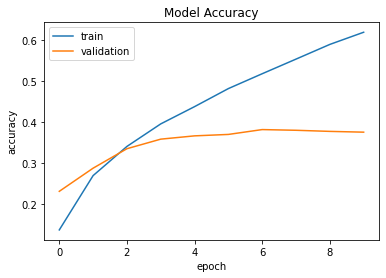

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')

In [23]:
prob = model.predict(X_test)
pred = np.argmax(prob, axis=1)

In [38]:
print(accuracy_score(y_test, pred))

0.3755


In [43]:
y_test = y_test.astype('int')



In [40]:
confusion_matrix(y_test, pred)

array([[62,  2,  1, ...,  0,  0,  1],
       [ 0, 50,  1, ...,  0,  0,  0],
       [ 2,  0, 30, ...,  1,  5,  3],
       ...,
       [ 0,  0,  1, ..., 49,  0,  1],
       [ 1,  0,  8, ...,  1, 20,  2],
       [ 1,  1,  1, ...,  0,  0, 32]])

Model Prediction

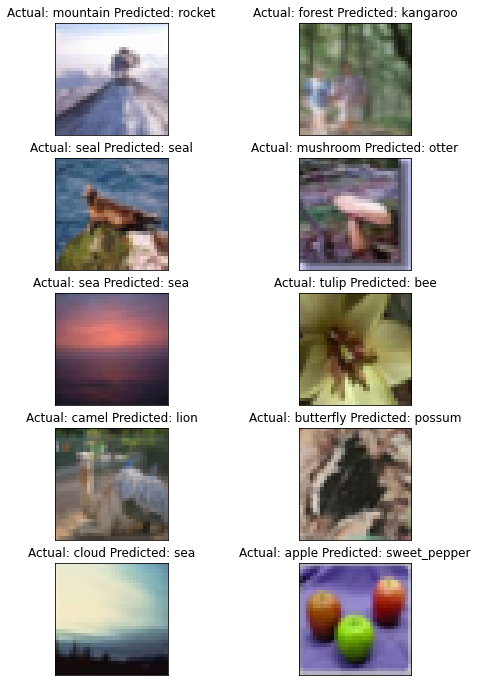

In [42]:
plt.figure(figsize=(8, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test[i])
    string = "Actual:"+ labels[1][y_test[i][0]] + " Predicted:" + labels[1][pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
plt.show()